In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV data into a DataFrame
data = pd.read_csv('../data/school.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 14 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Score                                                                                   3034 non-null   int64 
 1   Type of school                                                                          3034 non-null   object
 2   6. which activity of the school you enjoy the most?                                     3034 non-null   object
 3   7. Do you have good teacher-students relationship??                                     3034 non-null   object
 4   9. Do you feel performance pressure in examination?                                     3034 non-null   object
 5   14. Do you feel fear to examination?                                        

In [4]:
# Display the first few rows of the DataFrame
(data.head(1))

,Score,Type of school,6. which activity of the school you enjoy the most?,7. Do you have good teacher-students relationship??,9. Do you feel performance pressure in examination?,14. Do you feel fear to examination?,17. Do your teachers get personal involvement in your development?,1. Are you satisfied with the infrastructure of the school?,3. Are you satisfied with Teacher's contribution in your educational performance,5. Are you satisfied with Transportation facility provided by school,9. Do you satisfied with Teacher-students relationship?,10. Are you satisfied with School located in Rural area,11. Are you satisfied with School located in urban area?,14. Are you satisfied with the environment at school for your educational performance?
0,91,private school,extra carricular activity,Yes,No,No,No,Satisfied,highly satisfied,highly dis - satisfied,Neutral,highly satisfied,highly satisfied,highly satisfied


In [5]:
# Convert categorical columns to one-hot encoding
categorical_columns = ['Type of school',
                        '6. which activity of the school you enjoy the most?',
                        '1. Are you satisfied with the infrastructure of the school?',
                        "3. Are you satisfied with Teacher's contribution in your educational performance",
                        '5. Are you satisfied with Transportation facility provided by school',
                        '9. Do you satisfied with Teacher-students relationship?',
                        '10. Are you satisfied with School located in Rural area',
                        '11. Are you satisfied with School located in urban area?',
                        '14. Are you satisfied with the environment at school for your educational performance?']

data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded.head()

,Score,7. Do you have good teacher-students relationship??,9. Do you feel performance pressure in examination?,14. Do you feel fear to examination?,17. Do your teachers get personal involvement in your development?,Type of school_grant in aid school,Type of school_private school,6. which activity of the school you enjoy the most?_Annual day,6. which activity of the school you enjoy the most?_extra carricular activity,6. which activity of the school you enjoy the most?_sports events,...,10. Are you satisfied with School located in Rural area_highly Dis-satisfied,10. Are you satisfied with School located in Rural area_highly satisfied,11. Are you satisfied with School located in urban area?_Neutral,11. Are you satisfied with School located in urban area?_Satisfied,11. Are you satisfied with School located in urban area?_highly satisfied,14. Are you satisfied with the environment at school for your educational performance?_Dis-satisfied,14. Are you satisfied with the environment at school for your educational performance?_Neutral,14. Are you satisfied with the environment at school for your educational performance?_Satisfied,14. Are you satisfied with the environment at school for your educational performance?_highly Dis-satisfied,14. Are you satisfied with the environment at school for your educational performance?_highly satisfied
0,91,Yes,No,No,No,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,90,Yes,No,No,No,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
2,80,Yes,No,No,No,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,80,Yes,No,No,No,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
4,80,Yes,No,No,No,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True


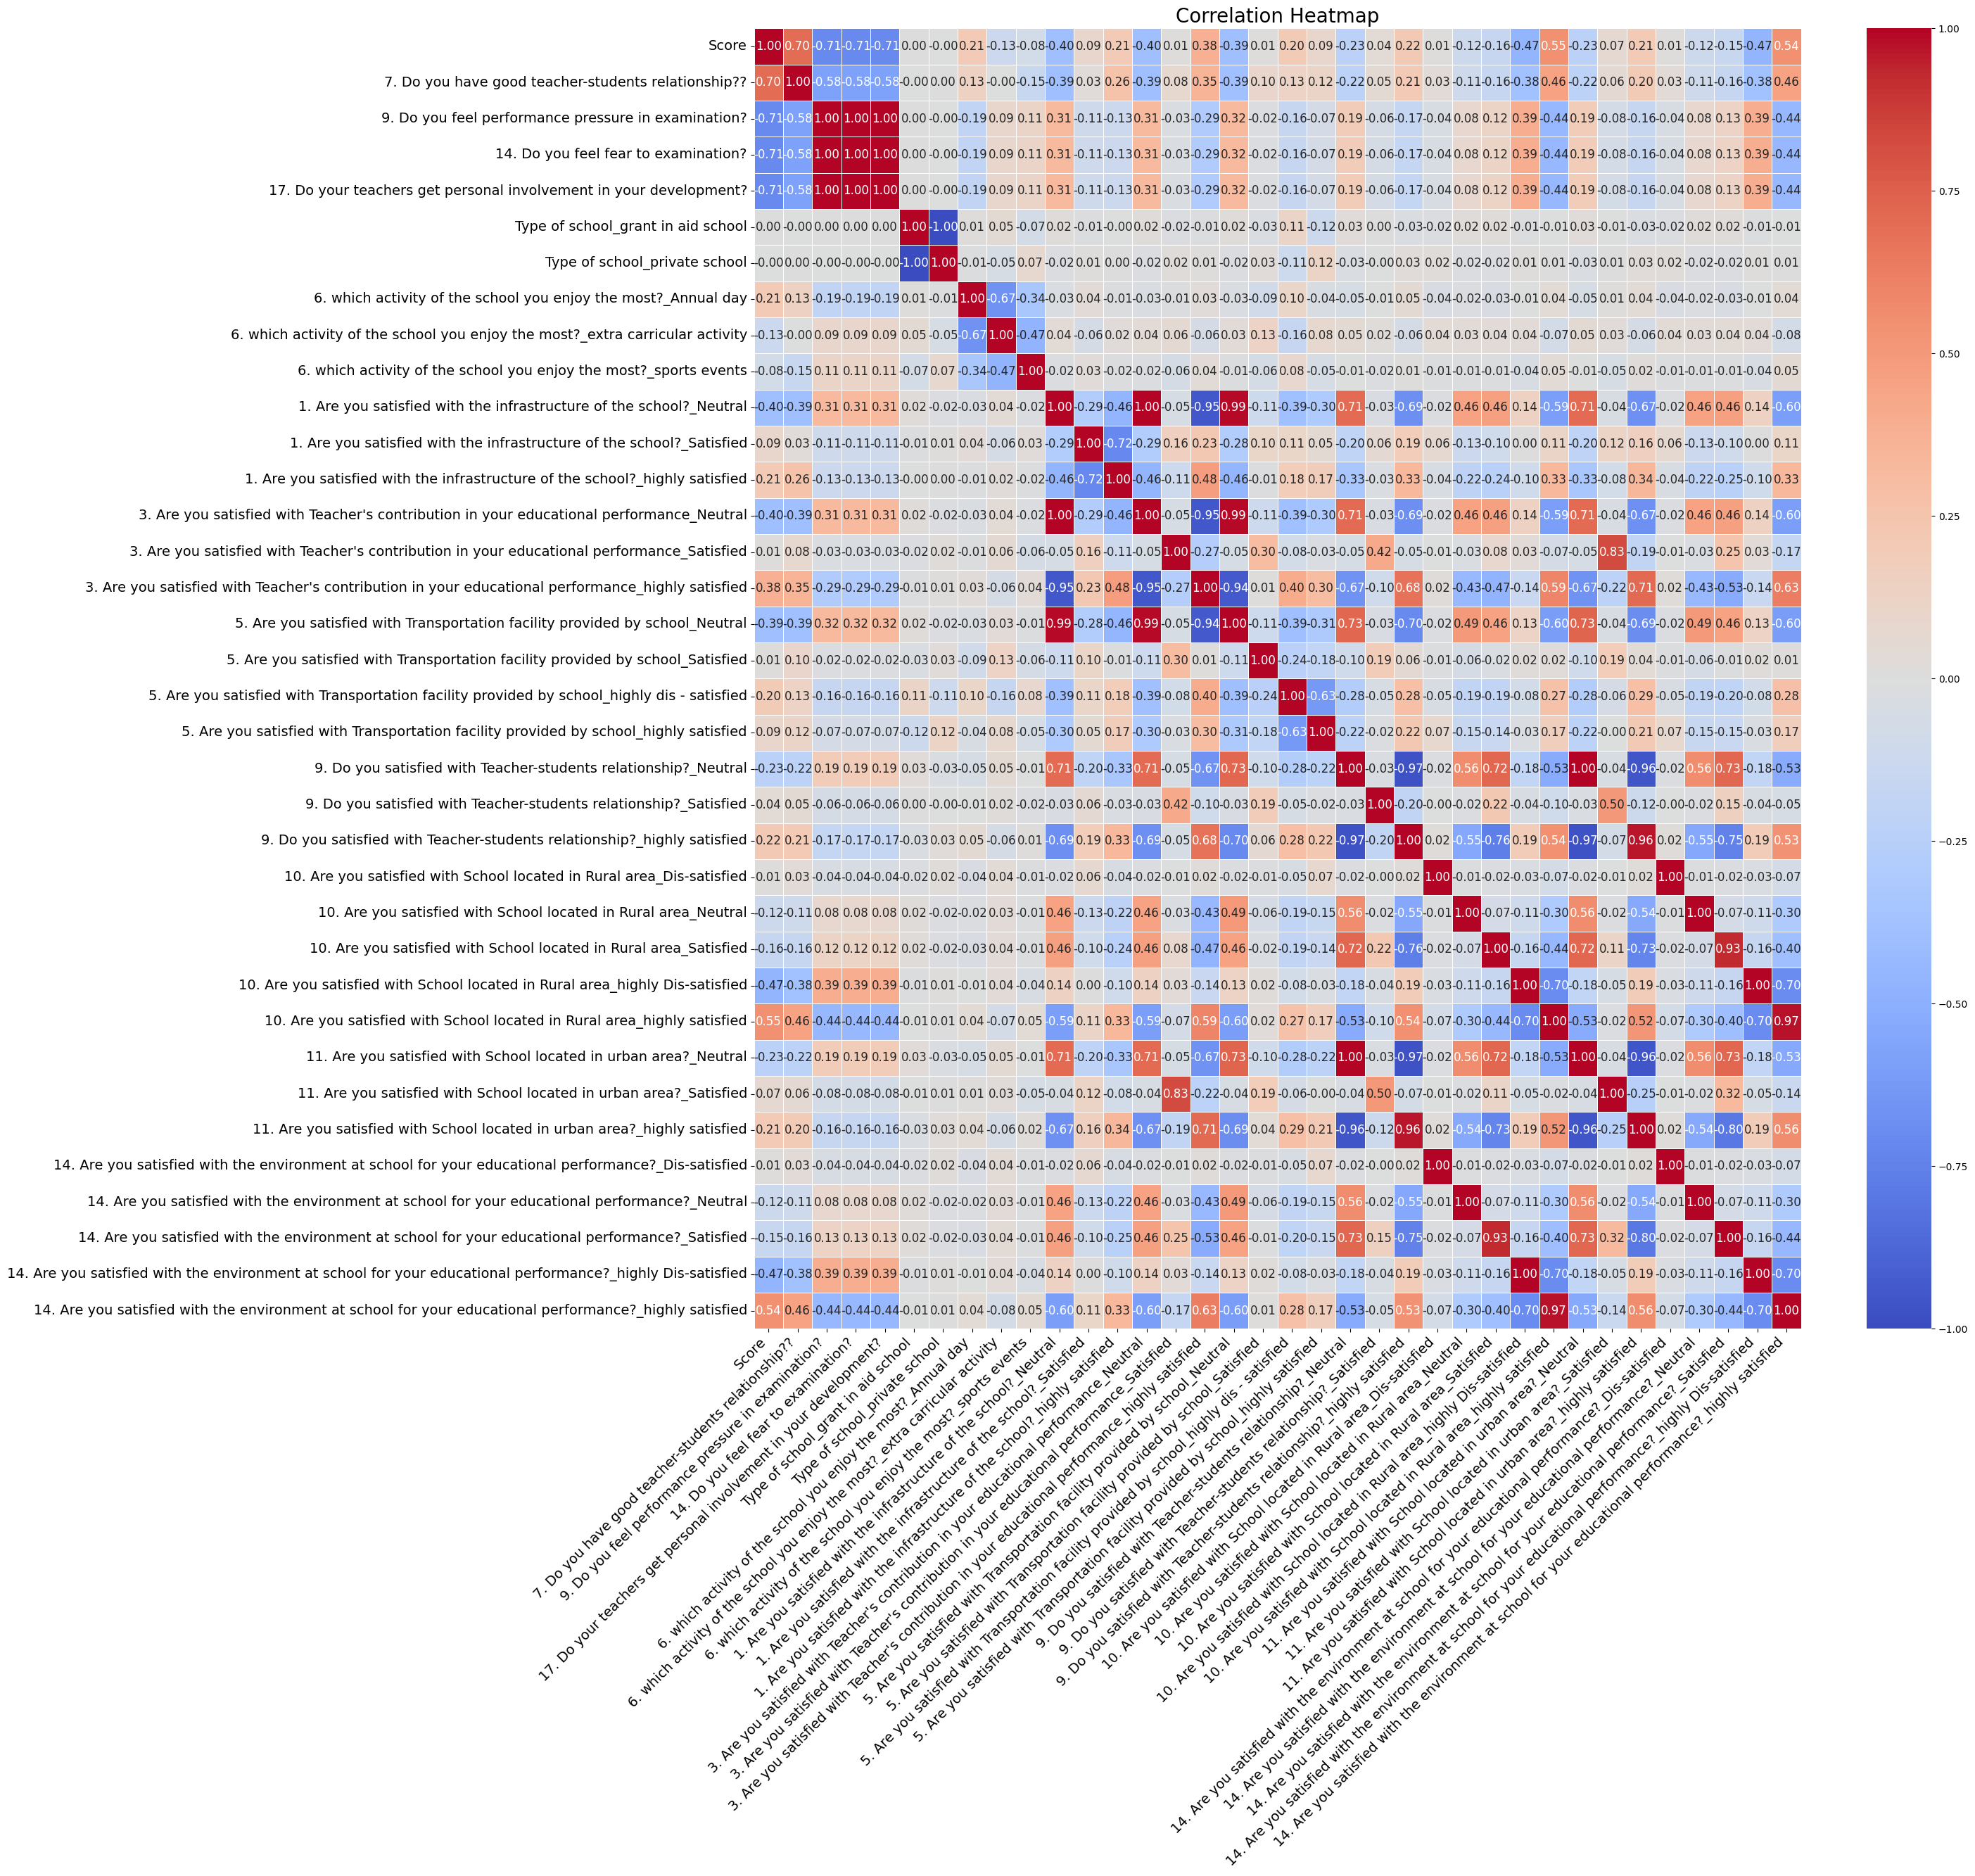

In [6]:
# Manually encode binary columns as 0 and 1
binary_columns = list(data_encoded.columns)[1:]
data_encoded[binary_columns] = data_encoded[binary_columns].replace({'No': 0, 'Yes': 1})

# Create a correlation matrix
correlation_matrix = data_encoded.corr()

# Set up a more advanced heatmap with larger figure size
plt.figure(figsize=(24, 24))

# Create a heatmap with more advanced formatting
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})

# Customize plot aesthetics
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Save the heatmap to a PDF file
heatmap.get_figure().savefig("school_performance_factors_heatmap.pdf", format="pdf", bbox_inches='tight')

# Display the heatmap
plt.show()


In [7]:
threshold = 0.2  # You can adjust this threshold as needed

# Calculate correlations with 'Score' column
correlation_with_score = correlation_matrix['Score']

# Filter columns based on the threshold
significant_columns = correlation_with_score[(correlation_with_score) > threshold].index

# Display significant columns
print("Columns with correlation above threshold:")
print(significant_columns)

Columns with correlation above threshold:
Index(['Score', '7. Do you have good teacher-students relationship??',
       '6. which activity of the school you enjoy the most?_Annual day',
       '1. Are you satisfied with the infrastructure of the school?_highly satisfied',
       '3. Are you satisfied with Teacher's contribution in your educational performance_highly satisfied',
       '9. Do you satisfied with Teacher-students relationship?_highly satisfied',
       '10. Are you satisfied with School located in Rural area_highly satisfied',
       '11. Are you satisfied with School located in urban area?_highly satisfied',
       '14. Are you satisfied with the environment at school for your educational performance?_highly satisfied'],
      dtype='object')


In [11]:
# Summary statistics
print(data.describe())

             Score
count  3034.000000
mean     77.506592
std       9.735817
min      51.000000
25%      72.000000
50%      80.000000
75%      83.000000
max      98.000000


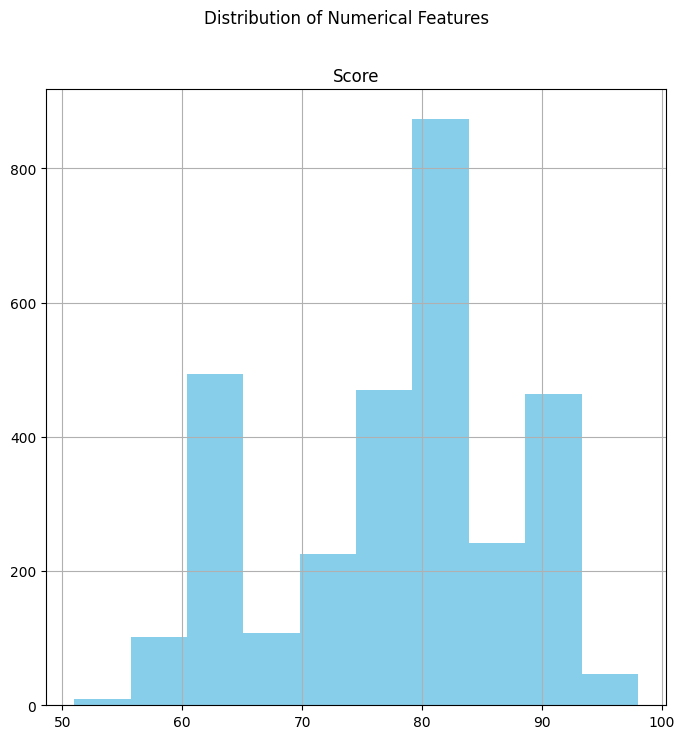

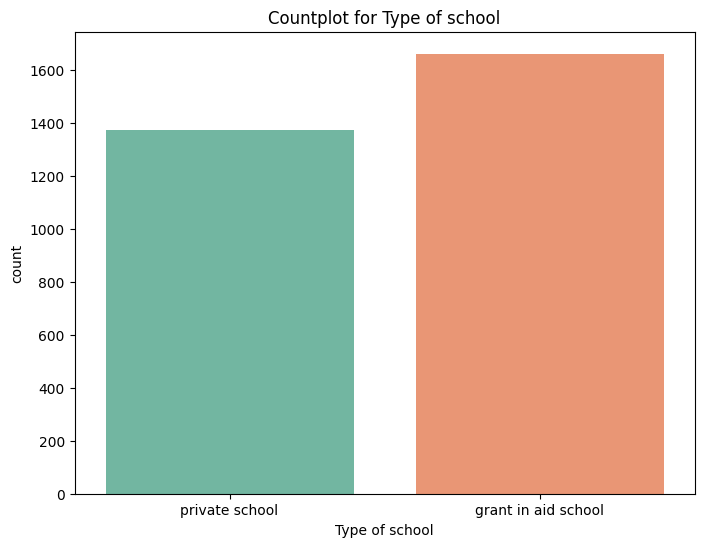

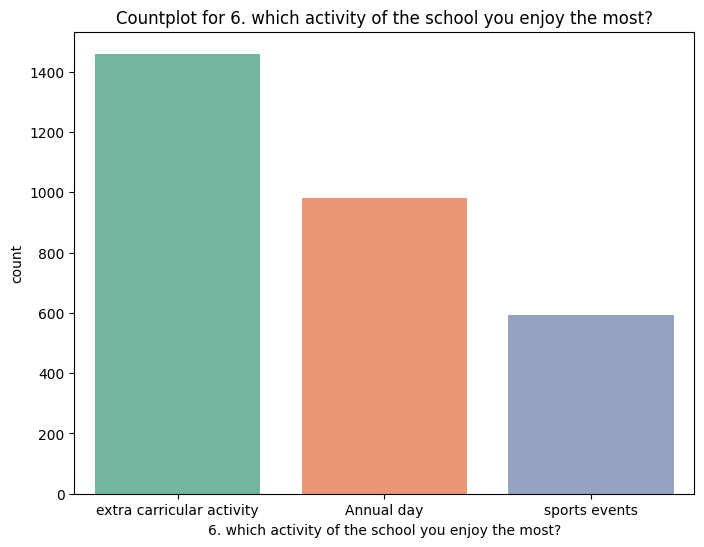

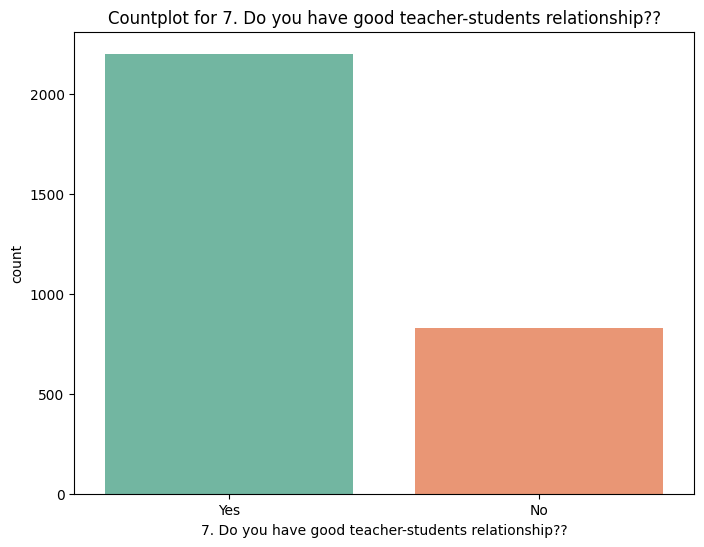

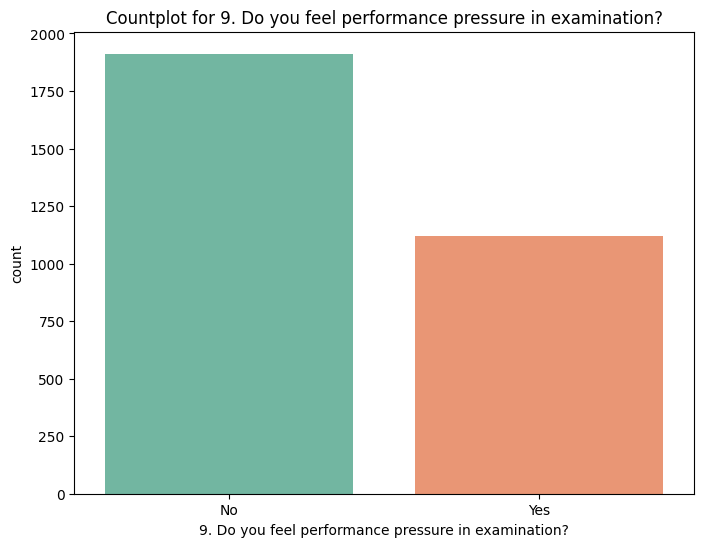

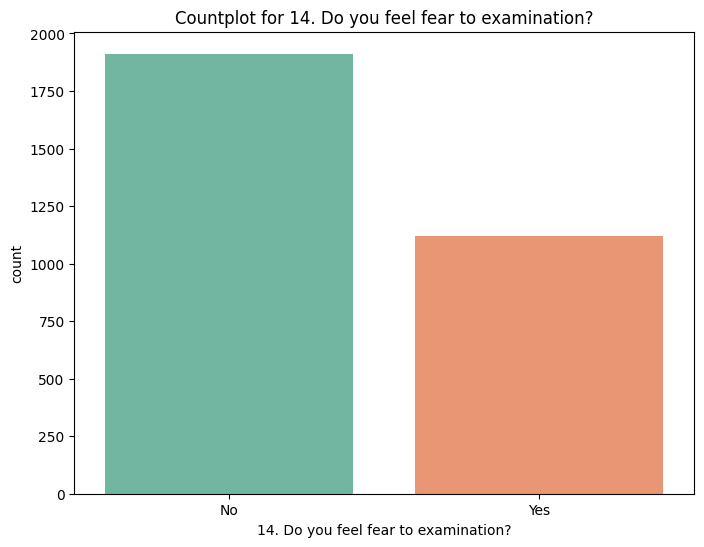

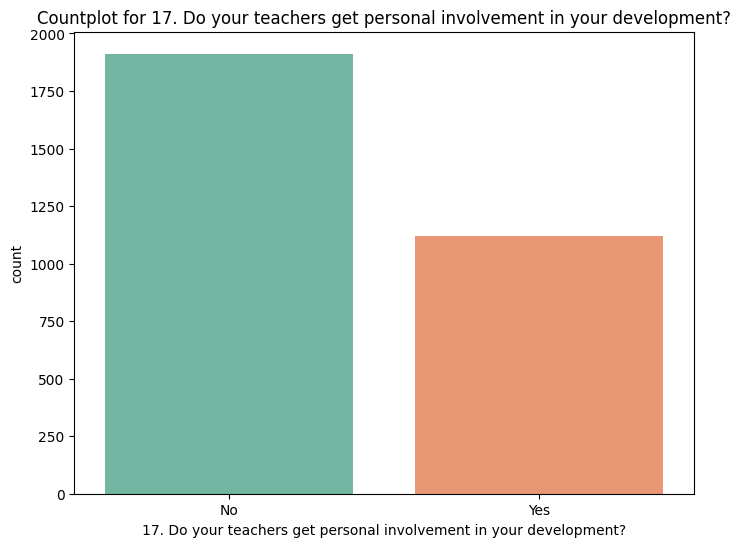

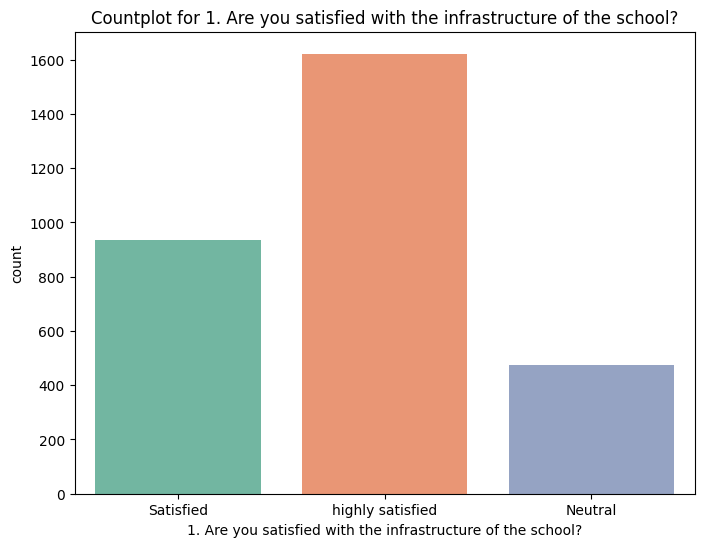

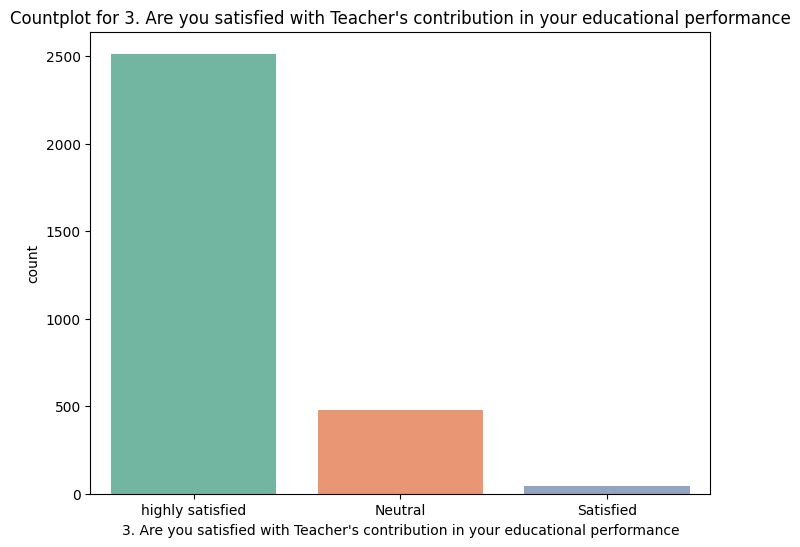

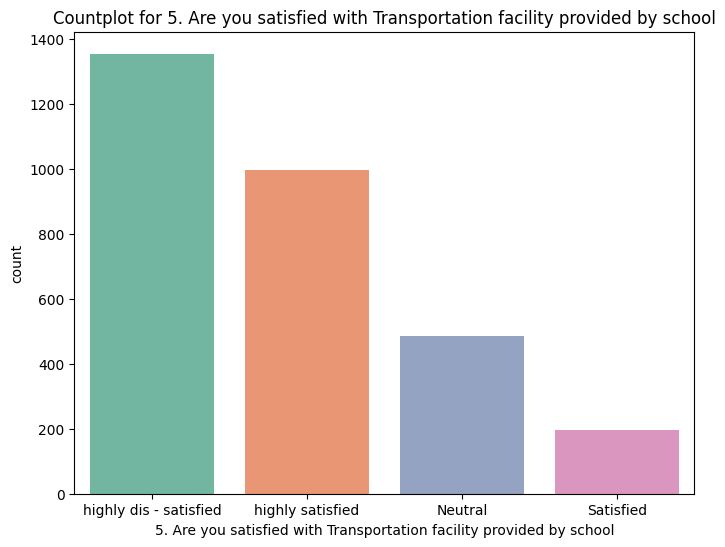

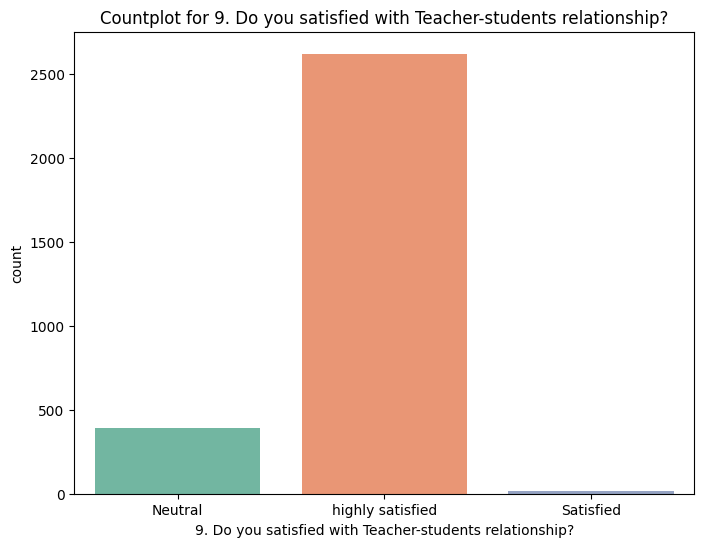

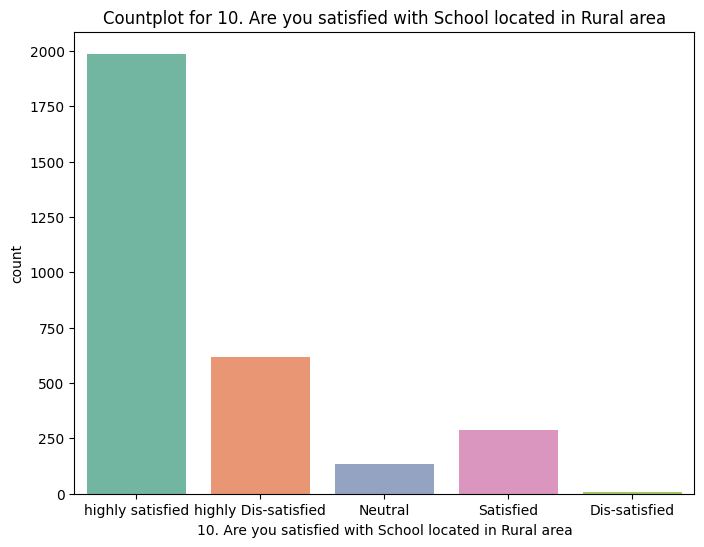

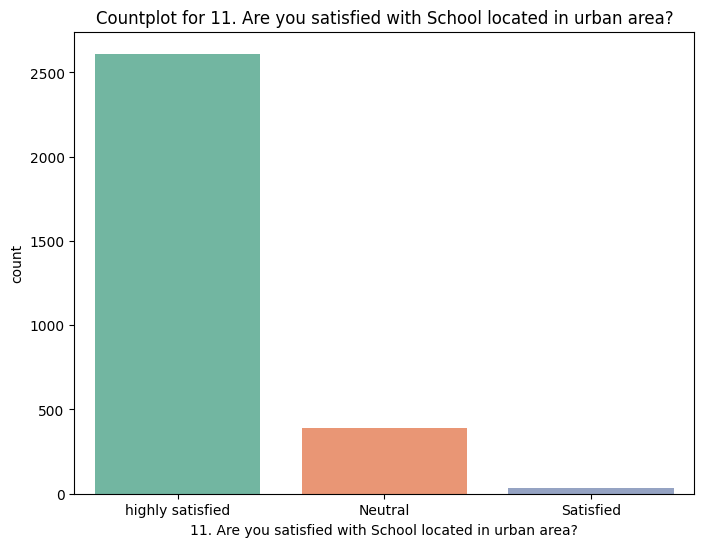

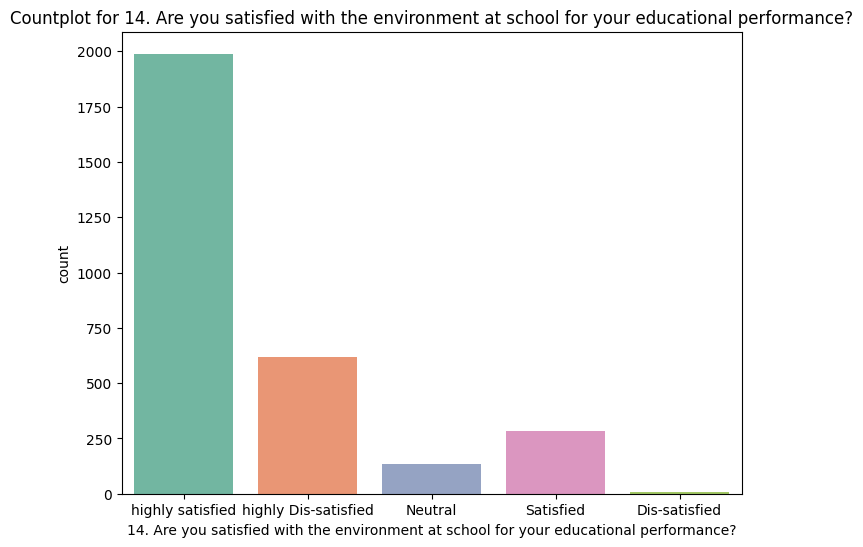

In [12]:
# Distribution of numerical features with colors
data.hist(figsize=(8, 8), color='skyblue')  # Adjust color as needed
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Countplot for categorical features with colors
categorical_features = list(data.columns)[1:]
palette = 'Set2'  # Choose a color palette

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, hue=feature, palette=palette, legend=False)
    plt.title(f'Countplot for {feature}')
    plt.show()